<a href="https://colab.research.google.com/github/anselmo-pitombeira/Notebooks/blob/master/Simula%C3%A7%C3%A3o_monte_carlo_VPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

rd.seed(1010)

# Parâmetros do problema
T = 12           # número de períodos (meses)
a = 500          # limite inferior do retorno mensal (R$)
b = 1500         # limite superior do retorno mensal (R$)
I = 10000        # investimento inicial (R$)
i = 0.005        # taxa de desconto mensal
N = 100_000         # tamanho da amostra (número de simulações de Monte Carlo)

# Variáveis para acumular resultados
amostra_VPL = []
conta_negativos = 0

# --- Simulação de Monte Carlo ---
for _ in range(N):
    # Gera retornos aleatórios para os 12 meses
    VPL = 0.0
    for t in range(1, T + 1):
        R_t = rd.uniform(a, b)         # retorno mensal
        VPL += R_t / (1 + i) ** t      # acumula valor presente do retorno

    VPL -= I  # subtrai o investimento inicial

    amostra_VPL.append(VPL)

    #soma_VPL += VPL
    if VPL < 0:
        conta_negativos += 1

# --- Cálculo das estimativas ---
VPL_medio_amostral = np.mean(amostra_VPL)
desv_pad_amostral = np.std(amostra_VPL)
prob_negativo = conta_negativos / N

# --- Resultados ---
print(f"Estimativa de E[VPL]: R$ {VPL_medio_amostral:.2f}")
print(f"Estimativa do desvio-padrão: R$ {desv_pad_amostral:.2f}")
print(f"Probabilidade(VPL < 0): {prob_negativo:.4f}")


Estimativa de E[VPL]: R$ 1623.36
Estimativa do desvio-padrão: R$ 966.58
Probabilidade(VPL < 0): 0.0457


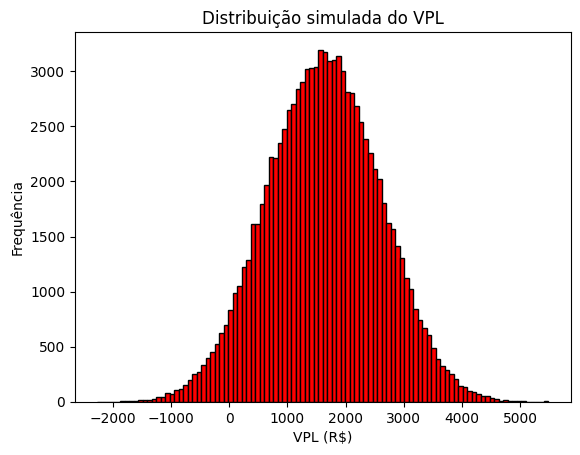

In [43]:
plt.hist(amostra_VPL, bins=100, color='r', edgecolor='k')
plt.title("Distribuição simulada do VPL")
plt.xlabel("VPL (R$)")
plt.ylabel("Frequência")
plt.show()
